In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"Marketing campaign dataset.csv")
data

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72607,3567,11,2022-11-28,4,Google Ads,15605,NaN,NaN,#The X Factor - Fashion for the Fearless,NaN,...,1,4.858090,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,chic jewelry
72608,3567,12,2022-11-29,128,Facebook Ads,15605,NaN,NaN,#Embrace Your Individuality with X,NaN,...,1,3.536262,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,statement pins
72609,3567,13,2022-11-30,128,Facebook Ads,15605,NaN,NaN,#The Power of X,NaN,...,1,1.947816,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,bridal jewelry
72610,3567,14,2022-12-01,4,Google Ads,15605,NaN,NaN,#Embrace Your Individuality with X,NaN,...,1,1.711467,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,jewelry sets


In [3]:
# no of rows and columns 
data.shape

(72612, 35)

In [4]:
#columns in dataset 
data.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'max_bid_cpm',
       'network_margin', 'campaign_budget_usd', 'impressions', 'clicks',
       'stats_currency', 'currency_code', 'exchange_rate', 'media_cost_usd',
       'position_in_content', 'unique_reach', 'total_reach', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords'],
      dtype='object')

In [5]:
data.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [6]:
data.describe()

,campaign_item_id,no_of_days,ext_service_id,creative_id,creative_width,creative_height,template_id,advertiser_id,network_id,approved_budget,...,max_bid_cpm,network_margin,campaign_budget_usd,impressions,clicks,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach
count,72612.000000,72612.000000,72612.000000,72612.000000,69200.000000,69200.000000,69200.000000,72612.000000,72612.000000,7.220600e+04,...,7406.0,72612.0,72612.000000,72612.000000,72612.000000,72612.0,72612.000000,0.0,0.0,0.0
mean,3130.143282,27.036344,49.449127,7450.124842,267.810694,223.175578,83.082659,6195.862213,345.272861,1.258064e+05,...,1.0,0.0,617.630284,1370.161847,52.696386,1.0,11.819999,NaN,NaN,NaN
std,142.154918,25.479175,55.881324,4062.384982,92.848075,77.373396,20.847618,387.864576,23.707191,5.626204e+05,...,0.0,0.0,1354.606619,3702.699962,377.308103,0.0,48.370659,NaN,NaN,NaN
min,2733.000000,0.000000,4.000000,1000.000000,0.000000,0.000000,23.000000,4756.000000,188.000000,4.000000e+02,...,1.0,0.0,2.452316,511.000000,2.000000,1.0,0.000000,NaN,NaN,NaN
25%,3148.000000,9.000000,4.000000,3725.000000,300.000000,250.000000,90.000000,6319.000000,353.000000,6.000000e+03,...,1.0,0.0,205.994550,526.000000,5.000000,1.0,0.435791,NaN,NaN,NaN
50%,3173.000000,19.000000,16.000000,7855.000000,300.000000,250.000000,90.000000,6385.000000,353.000000,1.000000e+04,...,1.0,0.0,377.656676,577.000000,8.000000,1.0,1.709001,NaN,NaN,NaN
75%,3202.000000,37.000000,128.000000,10995.000000,300.000000,250.000000,90.000000,6394.000000,353.000000,1.500000e+04,...,1.0,0.0,755.313351,816.000000,13.000000,1.0,8.276369,NaN,NaN,NaN
max,3960.000000,118.000000,128.000000,15605.000000,300.000000,250.000000,93.000000,6490.000000,353.000000,6.000000e+06,...,1.0,0.0,39559.896155,153959.000000,31807.000000,1.0,2295.028945,NaN,NaN,NaN


In [7]:
data.tail()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
72607,3567,11,2022-11-28,4,Google Ads,15605,NaN,NaN,#The X Factor - Fashion for the Fearless,NaN,...,1,4.858090,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,chic jewelry
72608,3567,12,2022-11-29,128,Facebook Ads,15605,NaN,NaN,#Embrace Your Individuality with X,NaN,...,1,3.536262,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,statement pins
72609,3567,13,2022-11-30,128,Facebook Ads,15605,NaN,NaN,#The Power of X,NaN,...,1,1.947816,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,bridal jewelry
72610,3567,14,2022-12-01,4,Google Ads,15605,NaN,NaN,#Embrace Your Individuality with X,NaN,...,1,1.711467,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,jewelry sets
72611,3567,15,2022-12-02,16,DV360,15605,NaN,NaN,#Be Bold. Be X,NaN,...,1,0.990870,NaN,NaN,NaN,Others,INR,Asia/Kolkata,week_day,fall jewelry


In [8]:
#type for each columns in datasets
data.dtypes

campaign_item_id         int64
no_of_days               int64
time                    object
ext_service_id           int64
ext_service_name        object
creative_id              int64
creative_width         float64
creative_height        float64
search_tags             object
template_id            float64
landing_page            object
advertiser_id            int64
advertiser_name         object
network_id               int64
approved_budget        float64
advertiser_currency     object
channel_id               int64
channel_name            object
max_bid_cpm            float64
network_margin         float64
campaign_budget_usd    float64
impressions              int64
clicks                   int64
stats_currency          object
currency_code           object
exchange_rate            int64
media_cost_usd         float64
position_in_content    float64
unique_reach           float64
total_reach            float64
search_tag_cat          object
cmi_currency_code       object
timezone

In [9]:
data.isnull().sum()

campaign_item_id           0
no_of_days                 0
time                       0
ext_service_id             0
ext_service_name           0
creative_id                0
creative_width          3412
creative_height         3412
search_tags                0
template_id             3412
landing_page               0
advertiser_id              0
advertiser_name            0
network_id                 0
approved_budget          406
advertiser_currency        0
channel_id                 0
channel_name               0
max_bid_cpm            65206
network_margin             0
campaign_budget_usd        0
impressions                0
clicks                     0
stats_currency             0
currency_code              0
exchange_rate              0
media_cost_usd             0
position_in_content    72612
unique_reach           72612
total_reach            72612
search_tag_cat             0
cmi_currency_code          0
timezone                   0
weekday_cat                0
keywords      

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

the above data has a lot of null value so 
so to repove it

In [11]:
# Calculate the total count of missing values for each variable
missing_values=data.isna().sum()
missing_values
# Calculate the percentage of missing values for each variable
percentage_missing=(missing_values*100)/data.isnull().count()
percentage_missing=percentage_missing.round()
percentage_missing

campaign_item_id         0.0
no_of_days               0.0
time                     0.0
ext_service_id           0.0
ext_service_name         0.0
creative_id              0.0
creative_width           5.0
creative_height          5.0
search_tags              0.0
template_id              5.0
landing_page             0.0
advertiser_id            0.0
advertiser_name          0.0
network_id               0.0
approved_budget          1.0
advertiser_currency      0.0
channel_id               0.0
channel_name             0.0
max_bid_cpm             90.0
network_margin           0.0
campaign_budget_usd      0.0
impressions              0.0
clicks                   0.0
stats_currency           0.0
currency_code            0.0
exchange_rate            0.0
media_cost_usd           0.0
position_in_content    100.0
unique_reach           100.0
total_reach            100.0
search_tag_cat           0.0
cmi_currency_code        0.0
timezone                 0.0
weekday_cat              0.0
keywords      

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       69200 non-null  float64
 7   creative_height      69200 non-null  float64
 8   search_tags          72612 non-null  object 
 9   template_id          69200 non-null  float64
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72206 non-null  float64
 15  advertiser_currency  72612 non-null 

In [13]:
# Create a DataFrame to store the missing data information and # Sort the DataFrame based on the total count of missing values in descending order
missing_data=pd.DataFrame({"Total":missing_values,"Percentage of Missing Values": percentage_missing,"Type":data.dtypes})
missing_data=missing_data.sort_values(by="Total",ascending=False)
missing_data

,Total,Percentage of Missing Values,Type
unique_reach,72612,100.0,float64
total_reach,72612,100.0,float64
position_in_content,72612,100.0,float64
max_bid_cpm,65206,90.0,float64
creative_width,3412,5.0,float64
creative_height,3412,5.0,float64
template_id,3412,5.0,float64
approved_budget,406,1.0,float64
exchange_rate,0,0.0,int64
clicks,0,0.0,int64


Handling missing values

In [14]:
# filling missing values with 0
data["creative_width"].fillna(0,inplace=True)
data["creative_height"].fillna(0,inplace=True)
data["template_id"].fillna(0,inplace=True)
data["approved_budget"].fillna(0,inplace=True)

as based on missing data table there are 4 columns who has missing values above 50% so just delete the columns

In [15]:
data.drop(columns=['unique_reach','total_reach','position_in_content','max_bid_cpm'],inplace=True)

In [16]:
data['creative_width']=data['creative_width'].astype(int)
data['creative_height']=data['creative_height'].astype(int)
data['template_id']=data['template_id'].astype(int)
data['approved_budget']=data['approved_budget'].astype(int)
data['network_margin']=data['network_margin'].astype(int)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       72612 non-null  int32  
 7   creative_height      72612 non-null  int32  
 8   search_tags          72612 non-null  object 
 9   template_id          72612 non-null  int32  
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72612 non-null  int32  
 15  advertiser_currency  72612 non-null 

In [18]:
#CTR
data["CTR"]=(data['clicks']/data['impressions']*100)
data["CTR"]

0        0.955795
1        1.670463
2        1.498829
3        2.062742
4        1.300390
           ...   
72607    5.288008
72608    4.739884
72609    3.250774
72610    3.039514
72611    2.333333
Name: CTR, Length: 72612, dtype: float64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       72612 non-null  int32  
 7   creative_height      72612 non-null  int32  
 8   search_tags          72612 non-null  object 
 9   template_id          72612 non-null  int32  
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72612 non-null  int32  
 15  advertiser_currency  72612 non-null 

In [20]:
data

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,stats_currency,currency_code,exchange_rate,media_cost_usd,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords,CTR
0,2733,7,2022-05-01,128,Facebook Ads,1000,300,250,#The Power of X,90,...,SGD,SGD,1,14.058514,Others,SGD,Asia/Singapore,week_end,delicate bracelets,0.955795
1,2733,8,2022-05-02,16,DV360,1000,300,250,#Be Bold. Be X,90,...,SGD,SGD,1,99.633496,Others,SGD,Asia/Singapore,week_day,summer jewelry,1.670463
2,2733,9,2022-05-03,128,Facebook Ads,1000,300,250,#Embrace Your Individuality with X,90,...,SGD,SGD,1,109.419677,Others,SGD,Asia/Singapore,week_day,artisan jewelry,1.498829
3,2733,10,2022-05-04,128,Facebook Ads,1000,300,250,#Be Bold. Be X,90,...,SGD,SGD,1,115.209499,Others,SGD,Asia/Singapore,week_day,layered bracelets,2.062742
4,2733,11,2022-05-05,4,Google Ads,1000,300,250,#Be Bold. Be X,90,...,SGD,SGD,1,66.990104,Others,SGD,Asia/Singapore,week_day,minimalist jewelry,1.300390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72607,3567,11,2022-11-28,4,Google Ads,15605,0,0,#The X Factor - Fashion for the Fearless,0,...,INR,INR,1,4.858090,Others,INR,Asia/Kolkata,week_day,chic jewelry,5.288008
72608,3567,12,2022-11-29,128,Facebook Ads,15605,0,0,#Embrace Your Individuality with X,0,...,INR,INR,1,3.536262,Others,INR,Asia/Kolkata,week_day,statement pins,4.739884
72609,3567,13,2022-11-30,128,Facebook Ads,15605,0,0,#The Power of X,0,...,INR,INR,1,1.947816,Others,INR,Asia/Kolkata,week_day,bridal jewelry,3.250774
72610,3567,14,2022-12-01,4,Google Ads,15605,0,0,#Embrace Your Individuality with X,0,...,INR,INR,1,1.711467,Others,INR,Asia/Kolkata,week_day,jewelry sets,3.039514


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72612 entries, 0 to 72611
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_item_id     72612 non-null  int64  
 1   no_of_days           72612 non-null  int64  
 2   time                 72612 non-null  object 
 3   ext_service_id       72612 non-null  int64  
 4   ext_service_name     72612 non-null  object 
 5   creative_id          72612 non-null  int64  
 6   creative_width       72612 non-null  int32  
 7   creative_height      72612 non-null  int32  
 8   search_tags          72612 non-null  object 
 9   template_id          72612 non-null  int32  
 10  landing_page         72612 non-null  object 
 11  advertiser_id        72612 non-null  int64  
 12  advertiser_name      72612 non-null  object 
 13  network_id           72612 non-null  int64  
 14  approved_budget      72612 non-null  int32  
 15  advertiser_currency  72612 non-null 

In [22]:
# as time column is object so convert it to datetime
data['time']=pd.to_datetime(data['time'])
data['time']


0       2022-05-01
1       2022-05-02
2       2022-05-03
3       2022-05-04
4       2022-05-05
           ...    
72607   2022-11-28
72608   2022-11-29
72609   2022-11-30
72610   2022-12-01
72611   2022-12-02
Name: time, Length: 72612, dtype: datetime64[ns]

In [23]:
data['spent_budget_per_day']=data['campaign_budget_usd']/data['no_of_days']
data['spent_budget_per_day']

0        93.167702
1        81.521739
2        72.463768
3        65.217391
4        59.288538
           ...    
72607    27.875963
72608    25.552966
72609    23.587353
72610    21.902542
72611    20.442373
Name: spent_budget_per_day, Length: 72612, dtype: float64

CTR stands for click-through rate. It is a metric that measures the percentage of people who see an online advertisement and then click on it.
The formula for calculating CTR is:
CTR = (Clicks / Impressions) x 100


visualization

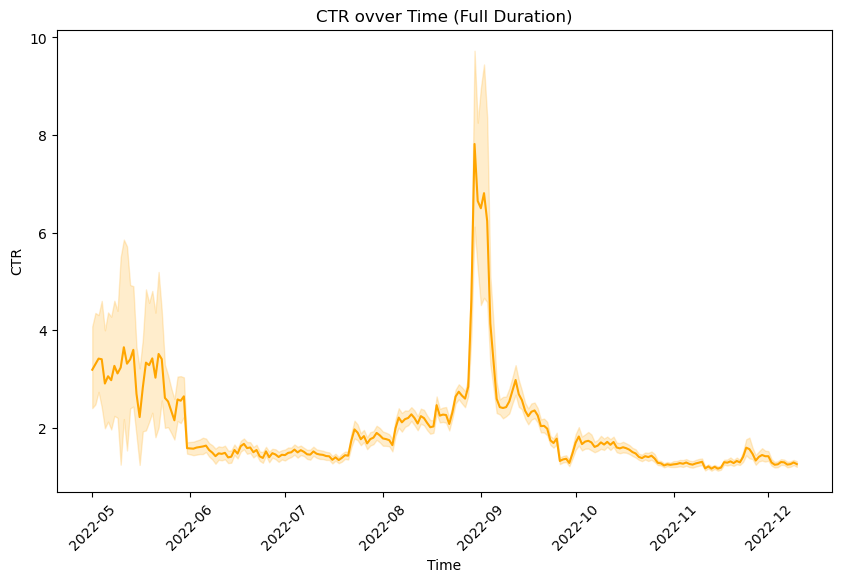

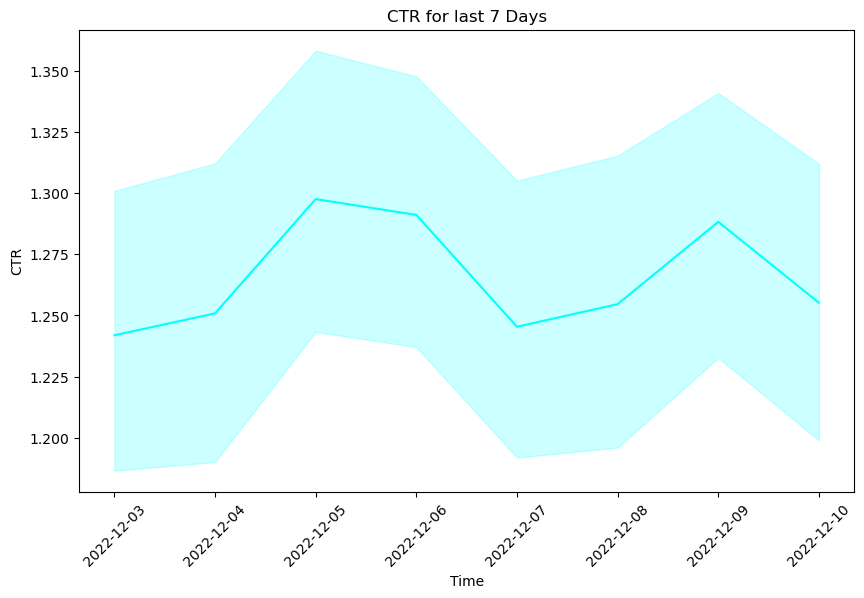

In [24]:

plt.figure(figsize=(10,6))
sns.lineplot(x='time',y='CTR',data=data,color='orange')
plt.title("CTR ovver Time (Full Duration)")
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.show()

# now for CTR for last 7 days
last_7_days= pd.to_datetime(data['time'].max())-pd.DateOffset(days=7)
last_7_days= data[data['time']>= last_7_days]

plt.figure(figsize=(10,6))
sns.lineplot(x='time',y='CTR',data=last_7_days,color='cyan')
plt.title("CTR for last 7 Days")
plt.xlabel('Time')
plt.ylabel('CTR')
plt.xticks(rotation=45)
plt.show()

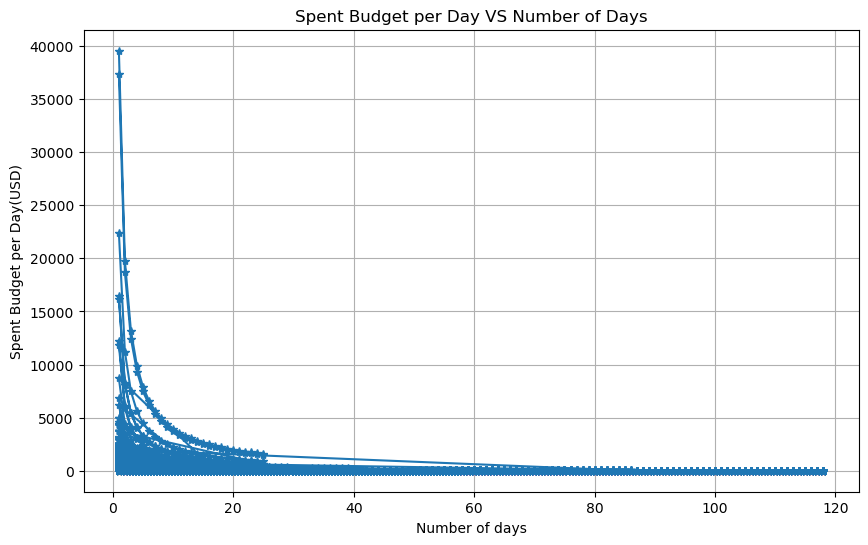

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(data['no_of_days'],data['spent_budget_per_day'],marker='*')
plt.grid(True)
plt.title('Spent Budget per Day VS Number of Days')
plt.xlabel('Number of days')
plt.ylabel('Spent Budget per Day(USD)')
plt.show() #data['spent_budget_per_day']

Insights
   The analysis shows that as the number of days increases in a campaign, the number of impressions and clicks tends to decrease. This suggests that optimization based on the performance metric, CTR, is necessary for long campaigns to avoid poor performance despite exhausting the budget. By comparing the spent budget with the number of days, we can identify different scenarios such as over-spending with good performance, under-spending with poor performance, and campaigns with good performance but under-utilized budget. Outliers in the graphs represent sudden spikes in impressions and clicks, potentially influenced by events such as festivals or social media popularity. Further analysis can be done to identify specific time periods, days, seasons, festivals, or holidays when performance tends to increase.

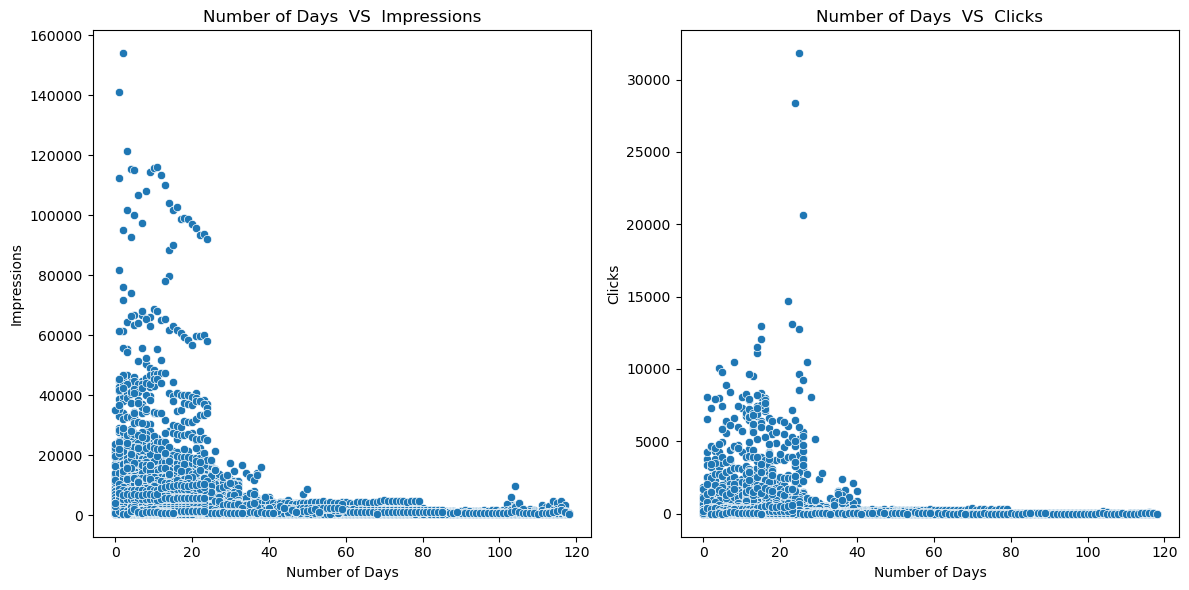

In [26]:
# Check scatter plots for number of days  VS  Impressions  VS  Clicks

# Create subplots
fig, axes = plt.subplots(1,2, figsize=(12,6))
#Scatter plot 1 :no_of_days  VS Impressions

sns.scatterplot(data=data,x='no_of_days',y='impressions',ax=axes[0])
axes[0].set_xlabel('Number of Days')
axes[0].set_ylabel('Impressions')
axes[0].set_title('Number of Days  VS  Impressions')

# Scatter plot 2 : NO_of_days  VS  Clicks
sns.scatterplot(data=data,x='no_of_days',y='clicks',ax=axes[1])
axes[1].set_xlabel('Number of Days')
axes[1].set_ylabel('Clicks')
axes[1].set_title('Number of Days  VS  Clicks')


 
plt.tight_layout()
plt.show()


insights


 number of Clicks and Impression have decreased over the period of time
 

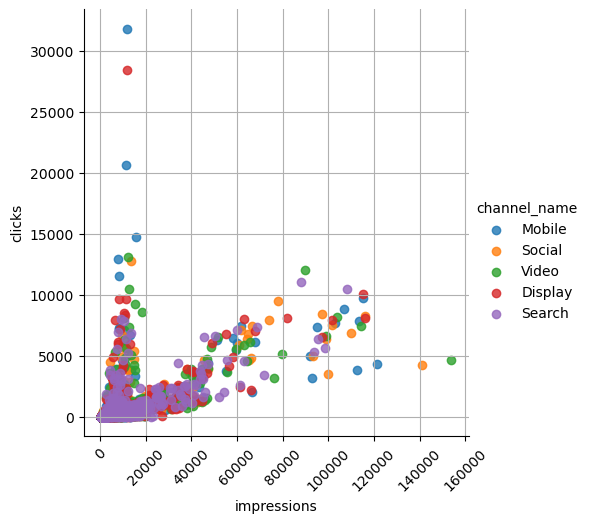

In [27]:
# Checking impression  VS  Click with channel distribution
#to create a scatter plot with a linear fit (regression line) by default. 
sns.lmplot(x='impressions',y='clicks',data=data,fit_reg=False,hue='channel_name')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Insights
   - Mobile campaigns receive more clicks compared to other campaigns. If a campaign is performing poorly for a prolonged period and needs to be paused, reallocating its budget to mobile campaigns can be beneficial.
- Search campaigns have lower impressions and clicks, indicating a need for improvement. Enhancing the performance of search campaigns can be achieved by using effective keywords, search tags, and compelling call-to-action strategies.
- Social campaigns & video have a wider reach but struggle to generate conversions. To improve the effectiveness of social campaigns, emphasis should be placed on enhancing the creative elements and making them more engaging to the target audience.

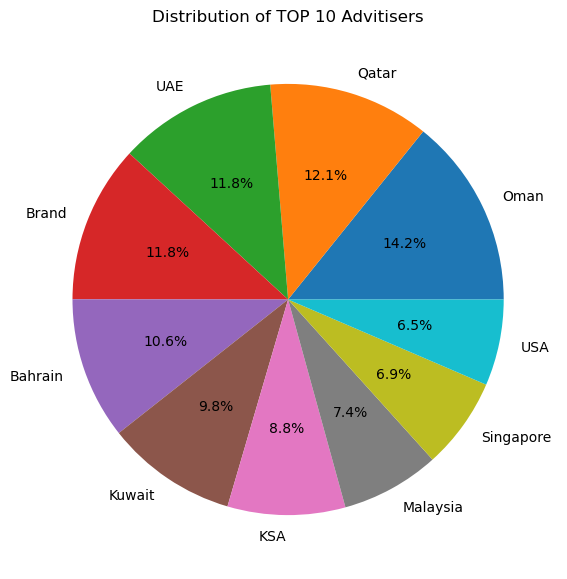

In [28]:
# pie chart to see Top 10 Adcertisers

counts=data['advertiser_name'].value_counts().head(10)
counts

# plot the pie Chart
plt.figure(figsize=(16,7))
plt.pie(counts.values,labels=counts.index,autopct='%1.1f%%')
plt.title('Distribution of TOP 10 Advitisers')
plt.show()

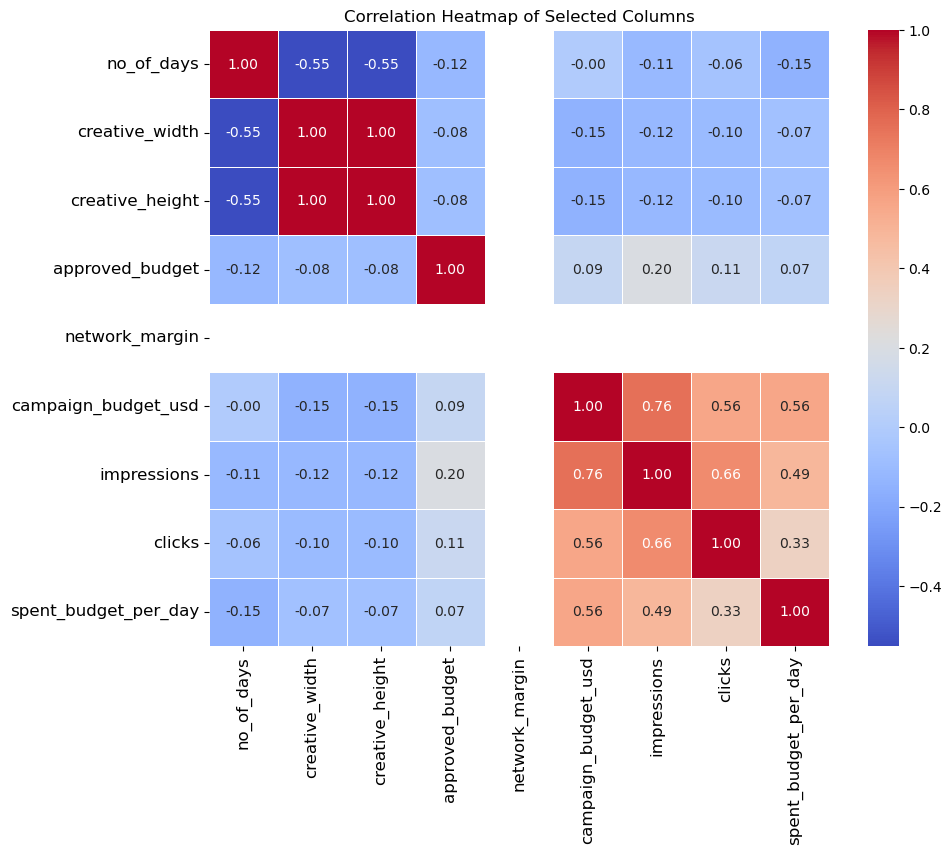

In [29]:

# Assuming 'data' is your DataFrame
selected_columns = ['no_of_days', 'creative_width', 'creative_height', 'approved_budget', 'network_margin',
                    'campaign_budget_usd', 'impressions', 'clicks', 'spent_budget_per_day']

# Extract the selected columns
selected_data = data[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Selected Columns')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [30]:
data.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'network_margin',
       'campaign_budget_usd', 'impressions', 'clicks', 'stats_currency',
       'currency_code', 'exchange_rate', 'media_cost_usd', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords', 'CTR',
       'spent_budget_per_day'],
      dtype='object')

In [31]:
y = data['CTR']
y

0        0.955795
1        1.670463
2        1.498829
3        2.062742
4        1.300390
           ...   
72607    5.288008
72608    4.739884
72609    3.250774
72610    3.039514
72611    2.333333
Name: CTR, Length: 72612, dtype: float64

In [32]:
# Split the data into features (X) and target variable (y)

X = data[['clicks', 'impressions','campaign_budget_usd','no_of_days','ext_service_id','media_cost_usd','advertiser_id'
          ,'network_id','approved_budget','channel_id']]
y = data['CTR']
print(X)
print(y)

       clicks  impressions  campaign_budget_usd  no_of_days  ext_service_id  \
0           8          837           652.173913           7             128   
1          44         2634           652.173913           8              16   
2          32         2135           652.173913           9             128   
3          48         2327           652.173913          10             128   
4          20         1538           652.173913          11               4   
...       ...          ...                  ...         ...             ...   
72607      56         1059           306.635594          11               4   
72608      41          865           306.635594          12             128   
72609      21          646           306.635594          13             128   
72610      20          658           306.635594          14               4   
72611      14          600           306.635594          15              16   

       media_cost_usd  advertiser_id  network_id  a

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


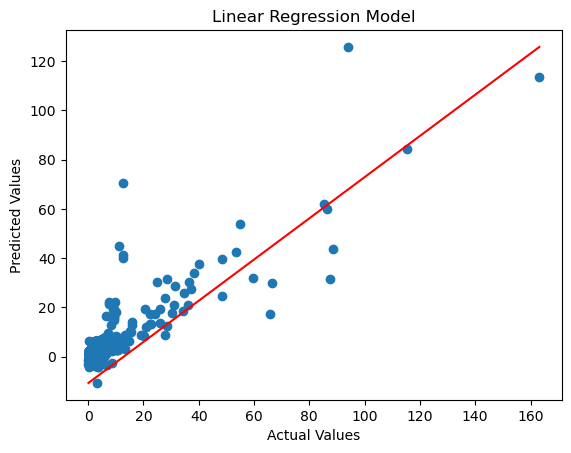

MSE: 2.8251213053867774
MAE: 0.7548389966086895
RMSE: 1.680809717185969


In [34]:
 
#Linear regression 


# Create an instance of the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

    #Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

In [35]:
# calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {round(r2*100,2)}%')

R-squared: 70.47%


In [36]:
# Print the first few predictions and actual values for linear Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

         Actual  Predicted
17318  2.991755   1.901442
50506  0.740741   1.583989
48085  1.607143   1.695326
37312  1.899827   1.711391
55413  1.147228   1.333408


In [38]:
# CV for Linear Regression

# Assuming you have your features (X) and target variable (y)

# Create a Linear Regression model
linear_regression_model = LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(linear_regression_model, X, y, cv=5, scoring='neg_mean_squared_error')  # You can change the number of folds (cv) and scoring metric

# Convert scores to positive values (MSE is negated during cross-validation)
cv_scores = -cv_scores
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the mean and standard deviation AND R^2 of the cross-validation scores
print("Cross-Validation Mean MSE:", cv_scores.mean())
print("Cross-Validation Standard Deviation MSE:", cv_scores.std())


Cross-Validation Mean MSE: 4.607039373509876
Cross-Validation Standard Deviation MSE: 4.971577313994198


In [39]:
# Print the first few predictions and actual values for Linear CV Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

         Actual  Predicted
17318  2.991755   1.901442
50506  0.740741   1.583989
48085  1.607143   1.695326
37312  1.899827   1.711391
55413  1.147228   1.333408


Mean Absolute Error: 0.469200333365858
Mean Squared Error: 1.8421531644395357
R-squared: 80.75%


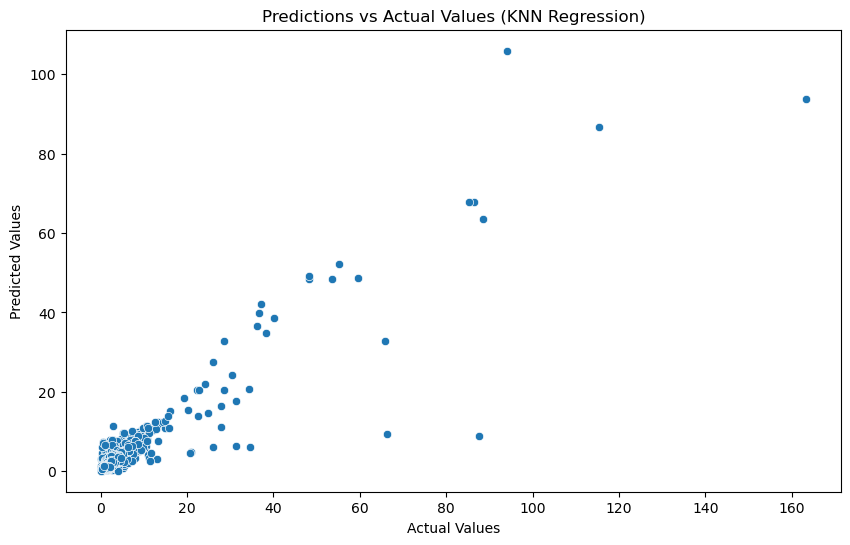

In [40]:
# knn


# Create a KNN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)



# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {round(r2*100,2)}%")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predictions vs Actual Values (KNN Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()




In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print(f'R-squared: {round(r2*100,2)}%')

Mean Squared Error (MSE): 1.8421531644395357
Mean Absolute Error (MAE): 0.469200333365858
R-squared: 80.75%


In [42]:
# Print the first few predictions and actual values for KNN Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

         Actual  Predicted
17318  2.991755   3.114273
50506  0.740741   1.369455
48085  1.607143   0.896212
37312  1.899827   1.046232
55413  1.147228   1.420325


Mean Squared Error: 0.5562810562805459


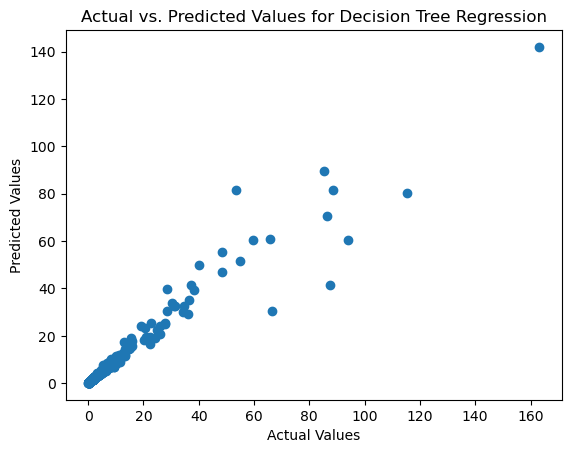

In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Create and train the Decision Tree Regressor model
regression_model = DecisionTreeRegressor(random_state=42)
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Decision Tree Regression")
plt.show()


In [44]:
# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {round(r2*100,2)}%')

Mean Squared Error: 0.5562810562805459
Mean Squared Error: 0.5562810562805459
R-squared: 94.19%


In [45]:
# Print the first few predictions and actual values for DECISION TREE Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

         Actual  Predicted
17318  2.991755   3.106188
50506  0.740741   0.740741
48085  1.607143   1.607143
37312  1.899827   1.899827
55413  1.147228   1.147228


Mean Absolute Error: 0.02499722590073678
Mean Squared Error: 0.3006235658967389
R-squared: 0.9685804842179995


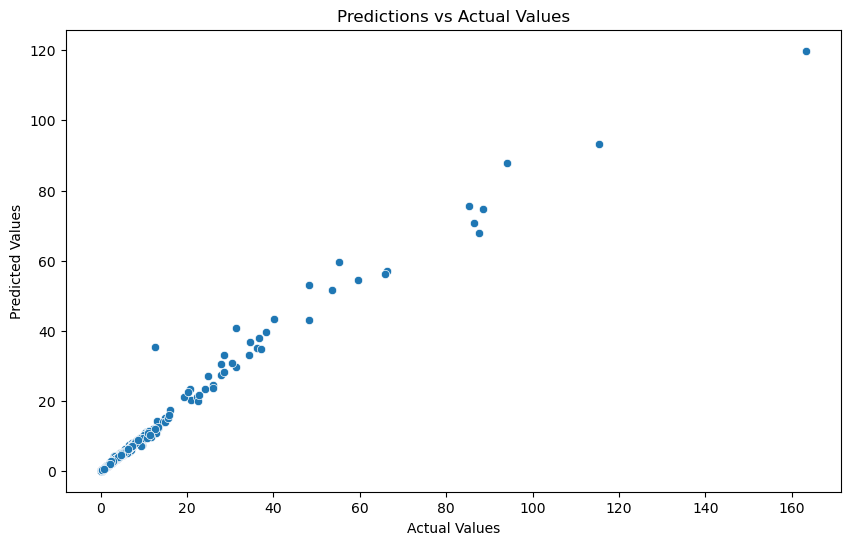

In [46]:


# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor()

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [47]:


r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Alternatively, you can calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {round(r2*100,2)}%')

R-squared: 0.9685804842179995
Mean Squared Error: 0.3006235658967389
Mean Squared Error: 0.3006235658967389
R-squared: 96.86%


In [48]:
# Print the first few predictions and actual values for Random Forest Model
result_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(result_data.head())

         Actual  Predicted
17318  2.991755   3.014733
50506  0.740741   0.740741
48085  1.607143   1.607143
37312  1.899827   1.899795
55413  1.147228   1.147228


In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming you have your features (X) and binary target variable (y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

# Display classification report
#print("Classification Report:\n", classification_report(y_test, y_pred))
'''

In [ ]:
'''from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have your features (X) and continuous target variable (y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Regression (SVR) model
svr_model = SVR(kernel='linear')  # You can choose different kernels like 'rbf', 'poly', etc.

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
'''

In [ ]:
'''
# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

# Display classification report
#print("Classification Report:\n", classification_report(y_test, y_pred))
'''

In [ ]:
'''
param_grid = {
    'n_estimators':[10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}
'''

In [ ]:
'''
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the model using cross-validation
mse_scores = -cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
avg_mse = np.mean(mse_scores)

# Print the results
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Average Cross-Validated MSE: {avg_mse}")

# Make predictions on test data (assuming X_test is available)
y_pred = best_rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")
'''